In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data.csv")

# Drop non-feature columns
df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")

# Encode target variable: 'M' = 1 (Malignant), 'B' = 0 (Benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']


In [ ]:
#Train/Test Split and Standardization

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
#Fit Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [21]:
#Evaluate the Model

Confusion Matrix:
 [[70  1]
 [ 2 41]]
Precision: 0.98
Recall: 0.95
ROC-AUC: 1.00


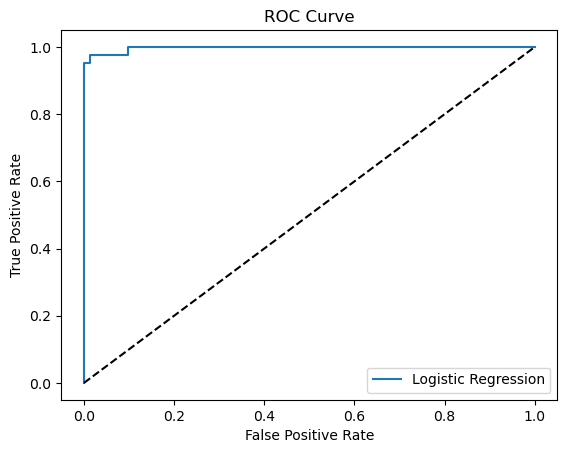

In [11]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predictions and probabilities
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluation metrics
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("Confusion Matrix:\n", cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
#Tune Threshold and Explain Sigmoid

In [23]:
import numpy as np

threshold = 0.3
y_pred_custom = (y_proba > threshold).astype(int)

# New metrics
precision_custom = precision_score(y_test, y_pred_custom)
recall_custom = recall_score(y_test, y_pred_custom)

print(f"Precision (threshold={threshold}): {precision_custom:.2f}")
print(f"Recall (threshold={threshold}): {recall_custom:.2f}")


Precision (threshold=0.3): 0.91
Recall (threshold=0.3): 0.98


In [25]:
#Sigmoid Function:

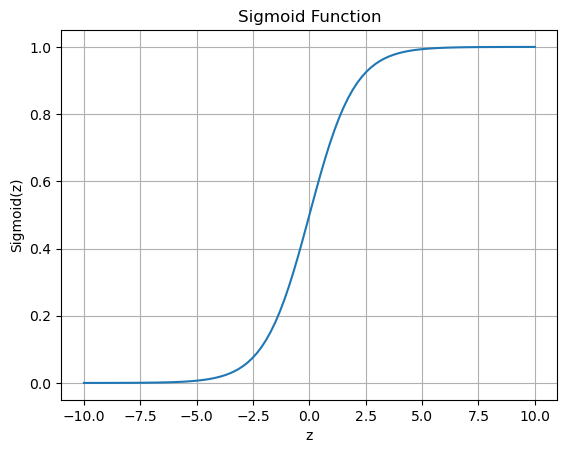

In [27]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))

plt.plot(z, sigmoid)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid(True)
plt.show()
